In [107]:
import numpy as np
import math
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
from dpca import DensityPeakCluster
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import folium

1. Hiển thị tọa độ của theo lat và lon của các nước lên một bản đồ

In [108]:
data = pd.read_csv('countries.csv')
data

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


Preproccessing data

In [109]:
data['latitude'].fillna(round(data['latitude'].mean()), inplace=True)
data['longitude'].fillna(round(data['longitude'].mean()), inplace=True)

df1 = data.iloc[:, [1,2]]
df1

,latitude,longitude
0,42.546245,1.601554
1,23.424076,53.847818
2,33.939110,67.709953
3,17.060816,-61.796428
4,18.220554,-63.068615
...,...,...
240,15.552727,48.516388
241,-12.827500,45.166244
242,-30.559482,22.937506
243,-13.133897,27.849332


In [110]:
myMap = folium.Map(location=[0, 0], zoom_start=2) 
icon = folium.Icon(color = 'red', icon = 'cloud')
for index, row in data.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['name'], icon=folium.Icon(icon='cloud')).add_to(myMap)
myMap

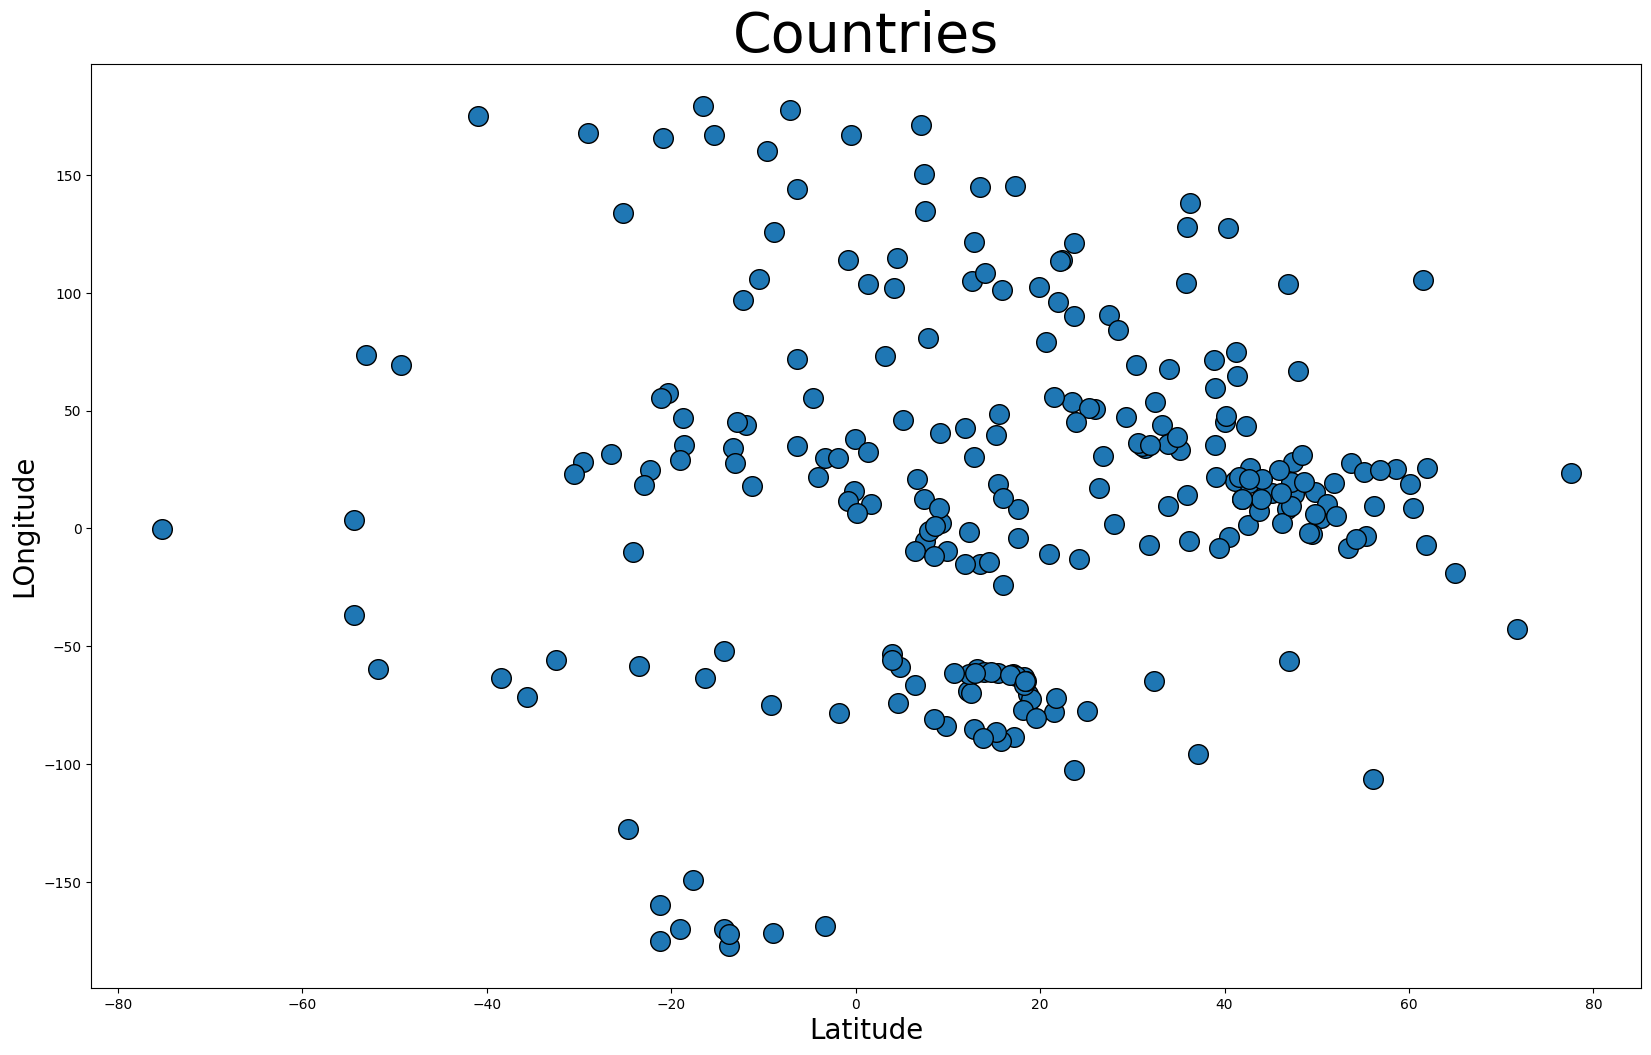

In [111]:
plt.figure(figsize=(20,12))
plt.scatter(
    data.iloc[:, 1], data.iloc[:, 2], edgecolor='black', s=200)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("LOngitude", fontsize=20)
plt.title('Countries', fontsize=40)
plt.show()

2. Phân cụm theo 3 thuật toán K-Means, DBSCAN, và DPC

2.1 Phân cụm theo K-Means

Elbow

In [112]:
distorsions = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1)
    distorsions.append(kmeans.inertia_)

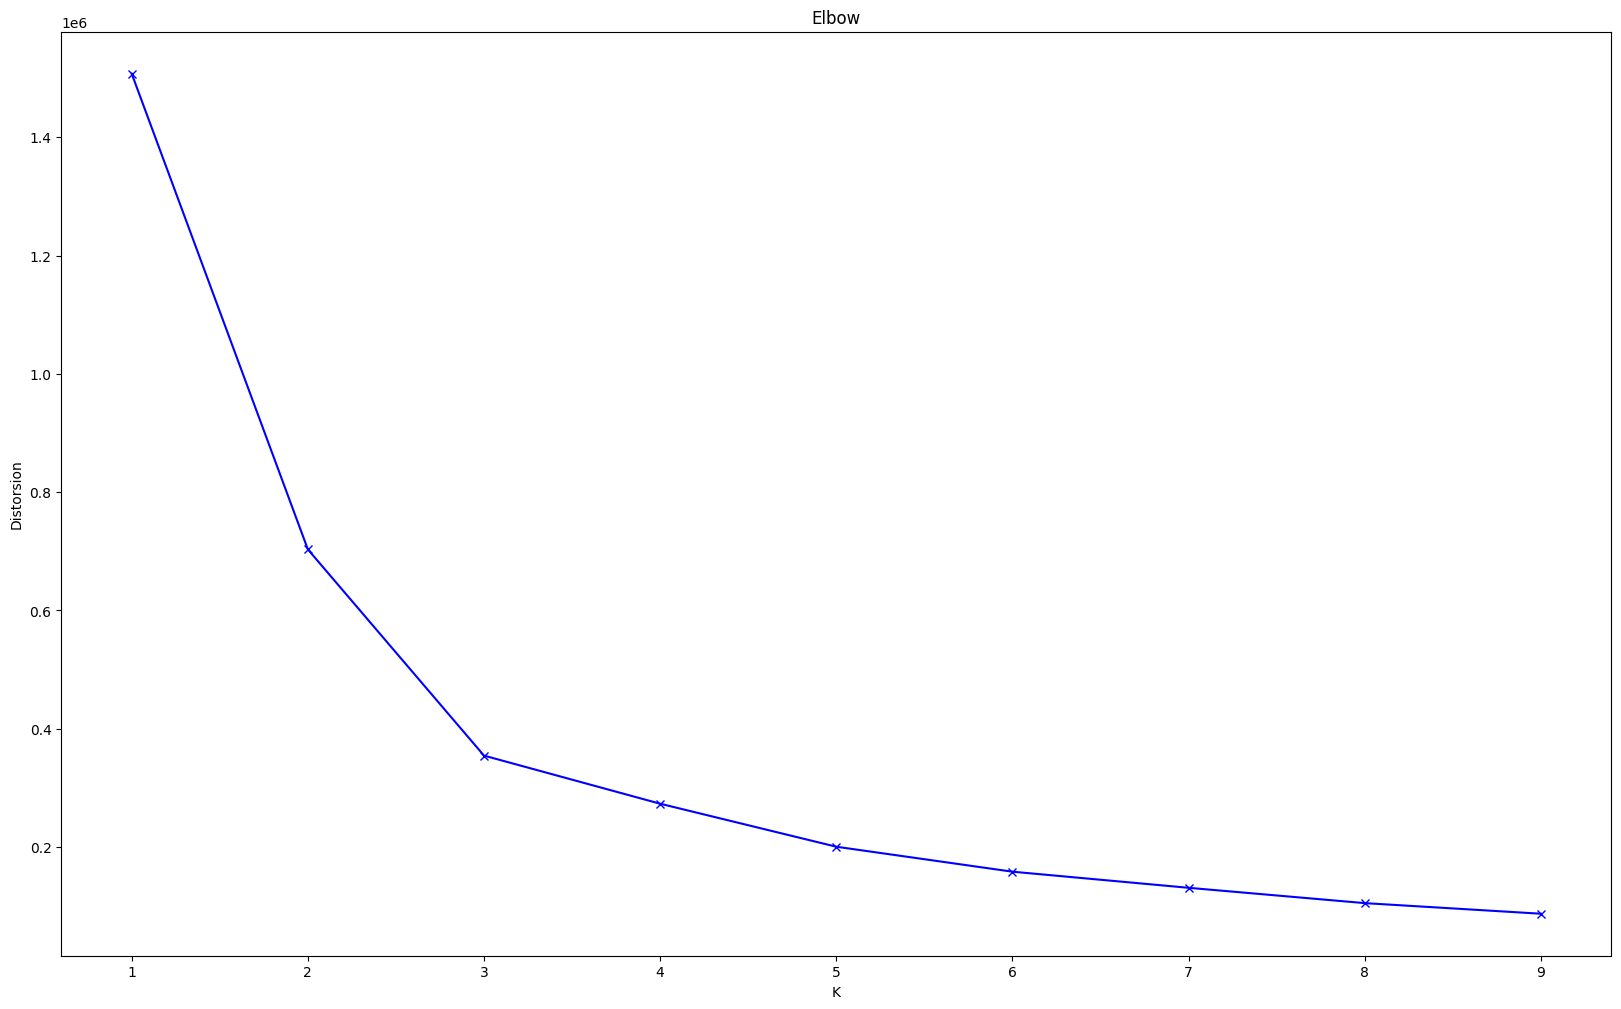

In [113]:
plt.figure(figsize=(20,12))
plt.plot(range(1,10),distorsions,'bx-')
plt.xlabel("K")
plt.ylabel("Distorsion")
plt.title("Elbow")
plt.show()

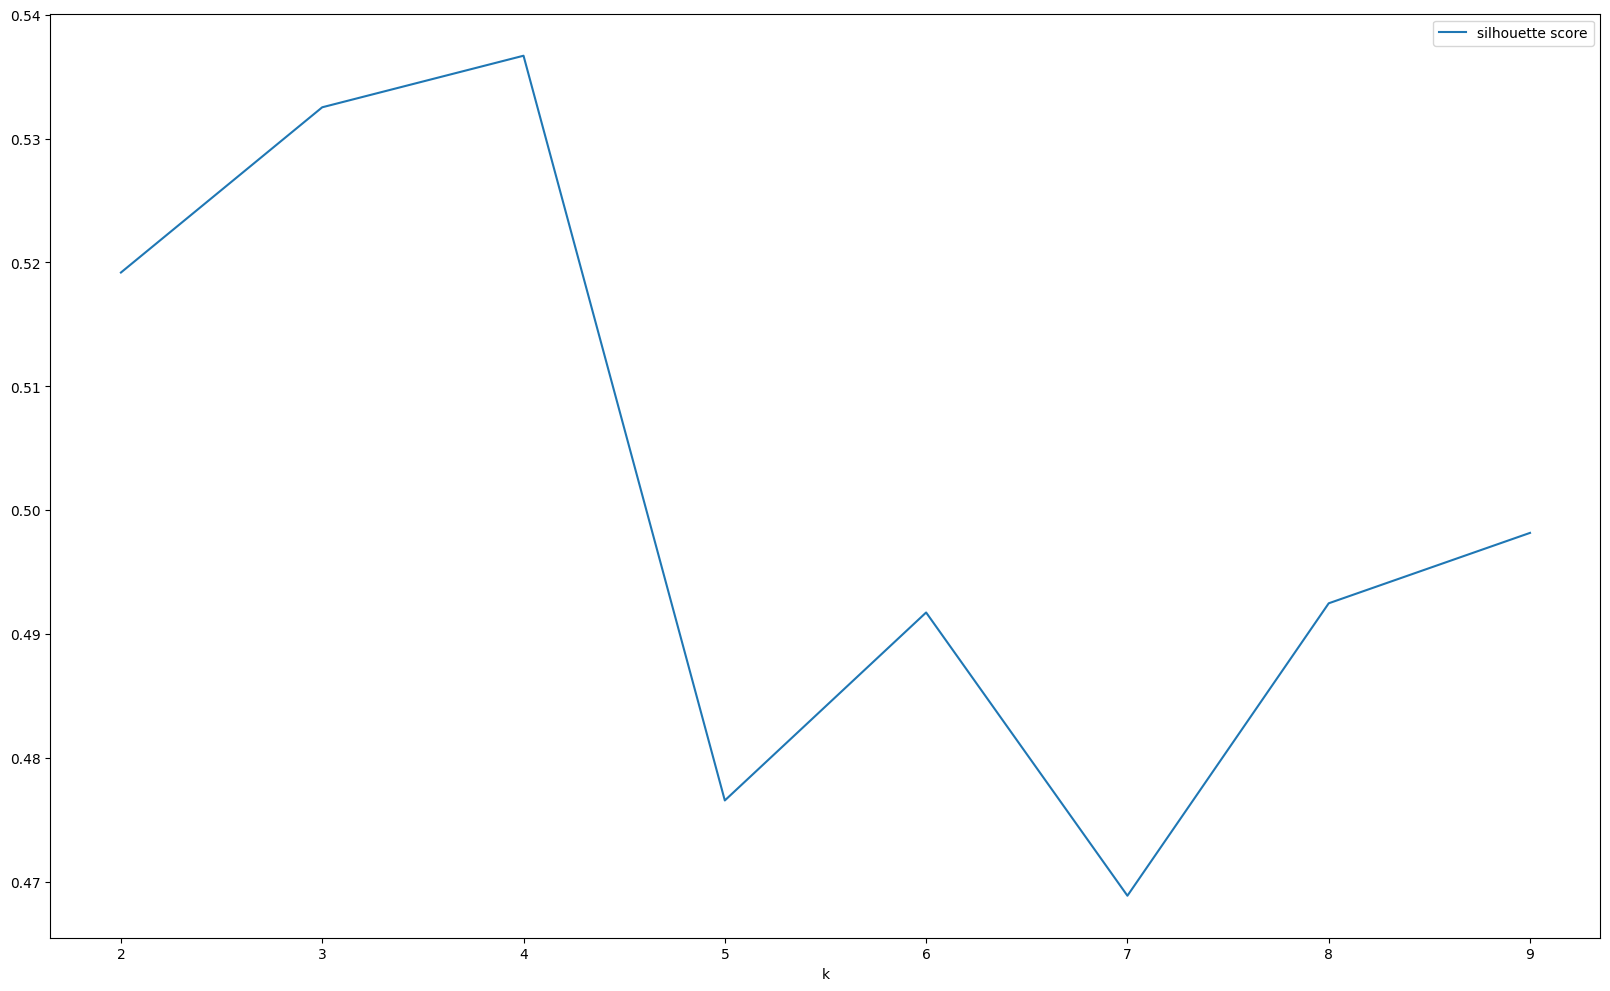

In [114]:
from sklearn.metrics.cluster import silhouette_score
k_values = []
silhouette_score_values = []

for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  y_pred = kmeans.fit_predict(df1)
  k_values.append(i)
  silhouette_score_values.append(metrics.silhouette_score(df1, y_pred))
result = pd.DataFrame({'k': k_values, 'silhouette score': silhouette_score_values})
result.plot.line(x='k', y = 'silhouette score', figsize=(20,12))
plt.show()

In [115]:
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(df1)
centers=kmeans.cluster_centers_

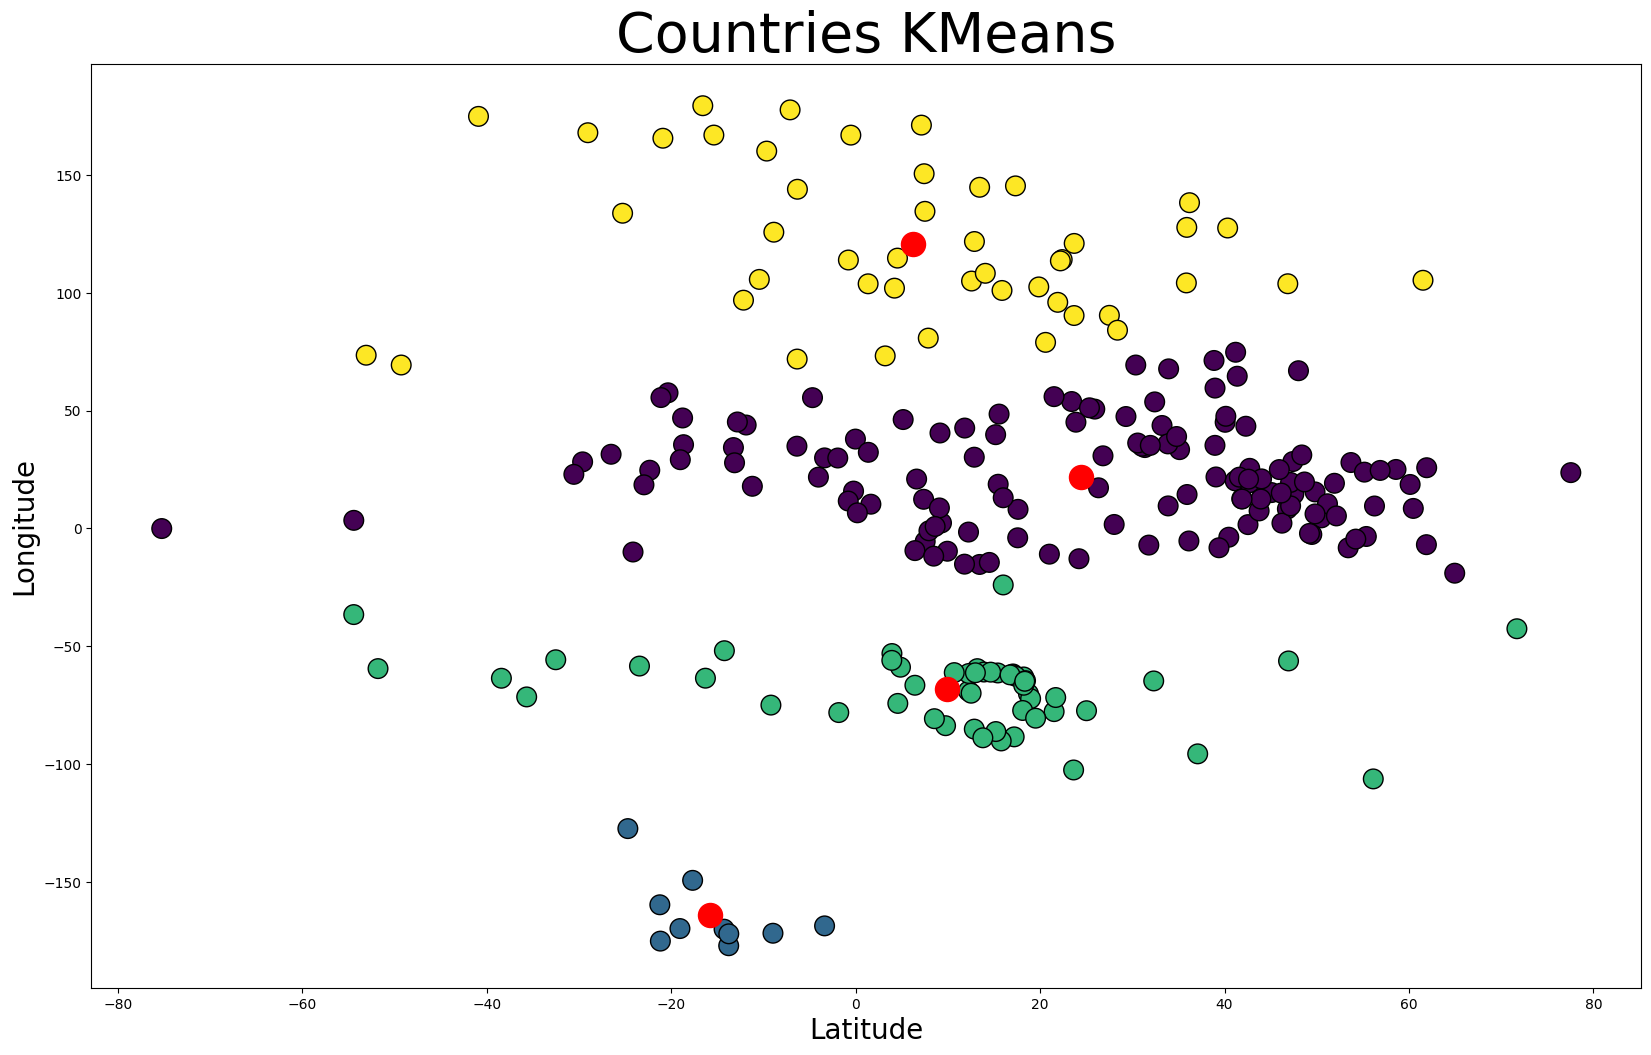

In [116]:
plt.figure(figsize=(20,12))
plt.scatter(
    data.iloc[:, 1],data.iloc[:, 2],
    c=y_pred, edgecolor='black', s=200
)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Longitude", fontsize=20)
plt.scatter(centers[:, 0], centers[:, 1], c='red',s=300)
plt.title("Countries KMeans", fontsize=40)
plt.show()

In [117]:
#Phân cụm bằng K-means
from folium.plugins import MarkerCluster
from folium import CircleMarker

labels = kmeans.labels_
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink',
           'gray', 'black', 'darkred', 'lightred', 'beige', 
           'darkblue', 'darkgreen', 'cadetblue', 'lightblue',
           'lightgreen', 'grayred', 'purple', 'orange', 
           'darkpurple', 'white', 'pink', 'lightgray', 'black']
myMap = folium.Map(location=[0, 0], zoom_start=2)
marker_cluster = MarkerCluster()
arr_data = np.array(data)
for i in range(len(arr_data)):
    folium.Marker(location=[arr_data[i][1], arr_data[i][2]], popup='Cluster ' + str(labels[i]+1), icon=folium.Icon(color=colors[labels[i]])).add_to(marker_cluster)
    CircleMarker(
        location=[arr_data[i][1], arr_data[i][2]],
        radius=7,
        color=colors[labels[i]],
        fill=True,
        fill_color=colors[labels[i]],
        fill_opacity=0.5
    ).add_to(myMap)
marker_cluster.add_to(myMap)
myMap

2.2 Phân loại theo DBSCAN.

Text(0.5, 0, 'Epsilon distance')

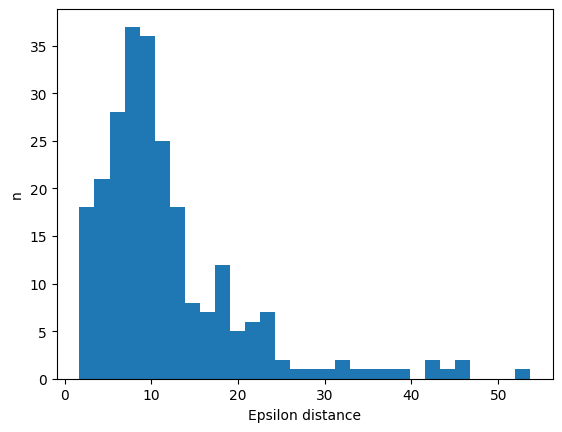

In [118]:
data_arr = np.array(df1)
def calculate_kn_distance(X,k):

    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(
                math.sqrt(
                    ((X[i,0] - X[j,0]) ** 2) +
                    ((X[i,1] - X[j,1]) ** 2)))

        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])

    return kn_distance
eps_dist = calculate_kn_distance(data_arr,5)
plt.hist(eps_dist,bins=30)
plt.ylabel('n')
plt.xlabel('Epsilon distance')

In [119]:
db = DBSCAN(eps=17, min_samples=4)
db.fit(df1)
y_pred_DB = db.fit_predict(df1)

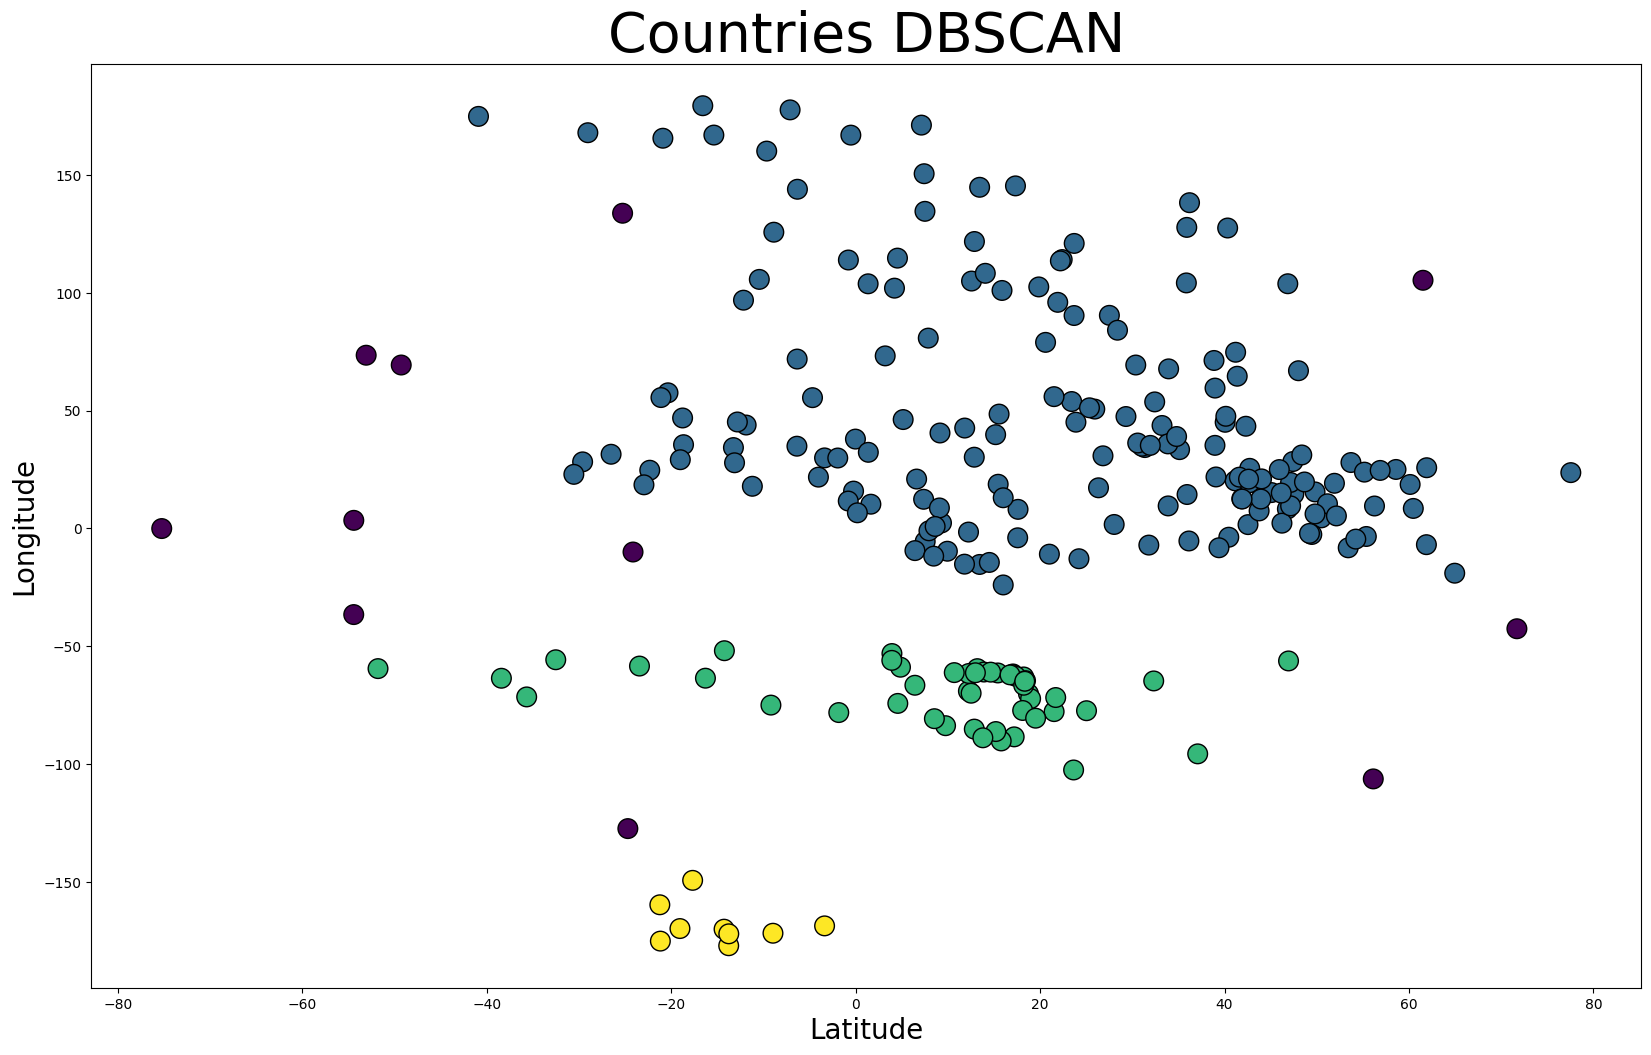

In [120]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=y_pred_DB, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("Latitude",fontsize=20)
plt.ylabel("Longitude",fontsize=20)
plt.title( "Countries DBSCAN", fontsize=40)
plt.show()

In [121]:
from folium.plugins import MarkerCluster
from folium import CircleMarker

labels = db.labels_
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink',
           'gray', 'black', 'darkred', 'lightred', 'beige', 
           'darkblue', 'darkgreen', 'cadetblue', 'lightblue',
           'lightgreen', 'grayred', 'purple', 'orange', 
           'darkpurple', 'white', 'pink', 'lightgray', 'black']
myMap = folium.Map(location=[0, 0], zoom_start=2)
marker_cluster = MarkerCluster()
arr_data = np.array(data)
for i in range(len(arr_data)):
    folium.Marker(location=[arr_data[i][1], arr_data[i][2]], popup='Cluster ' + str(labels[i]+1), icon=folium.Icon(color=colors[labels[i]])).add_to(marker_cluster)
    CircleMarker(
        location=[arr_data[i][1], arr_data[i][2]],
        radius=7,
        color=colors[labels[i]],
        fill=True,
        fill_color=colors[labels[i]],
        fill_opacity=0.5
    ).add_to(myMap)
marker_cluster.add_to(myMap)
myMap

2.3 Phân cụm theo DPC.

In [122]:
dpca = DensityPeakCluster( distance_threshold=60, anormal=False)
dpca.fit(df1)

In [123]:
rho = dpca.local_density()
delta, nneigh = dpca.min_neighbor_and_distance()
labels, center = dpca.collapse()

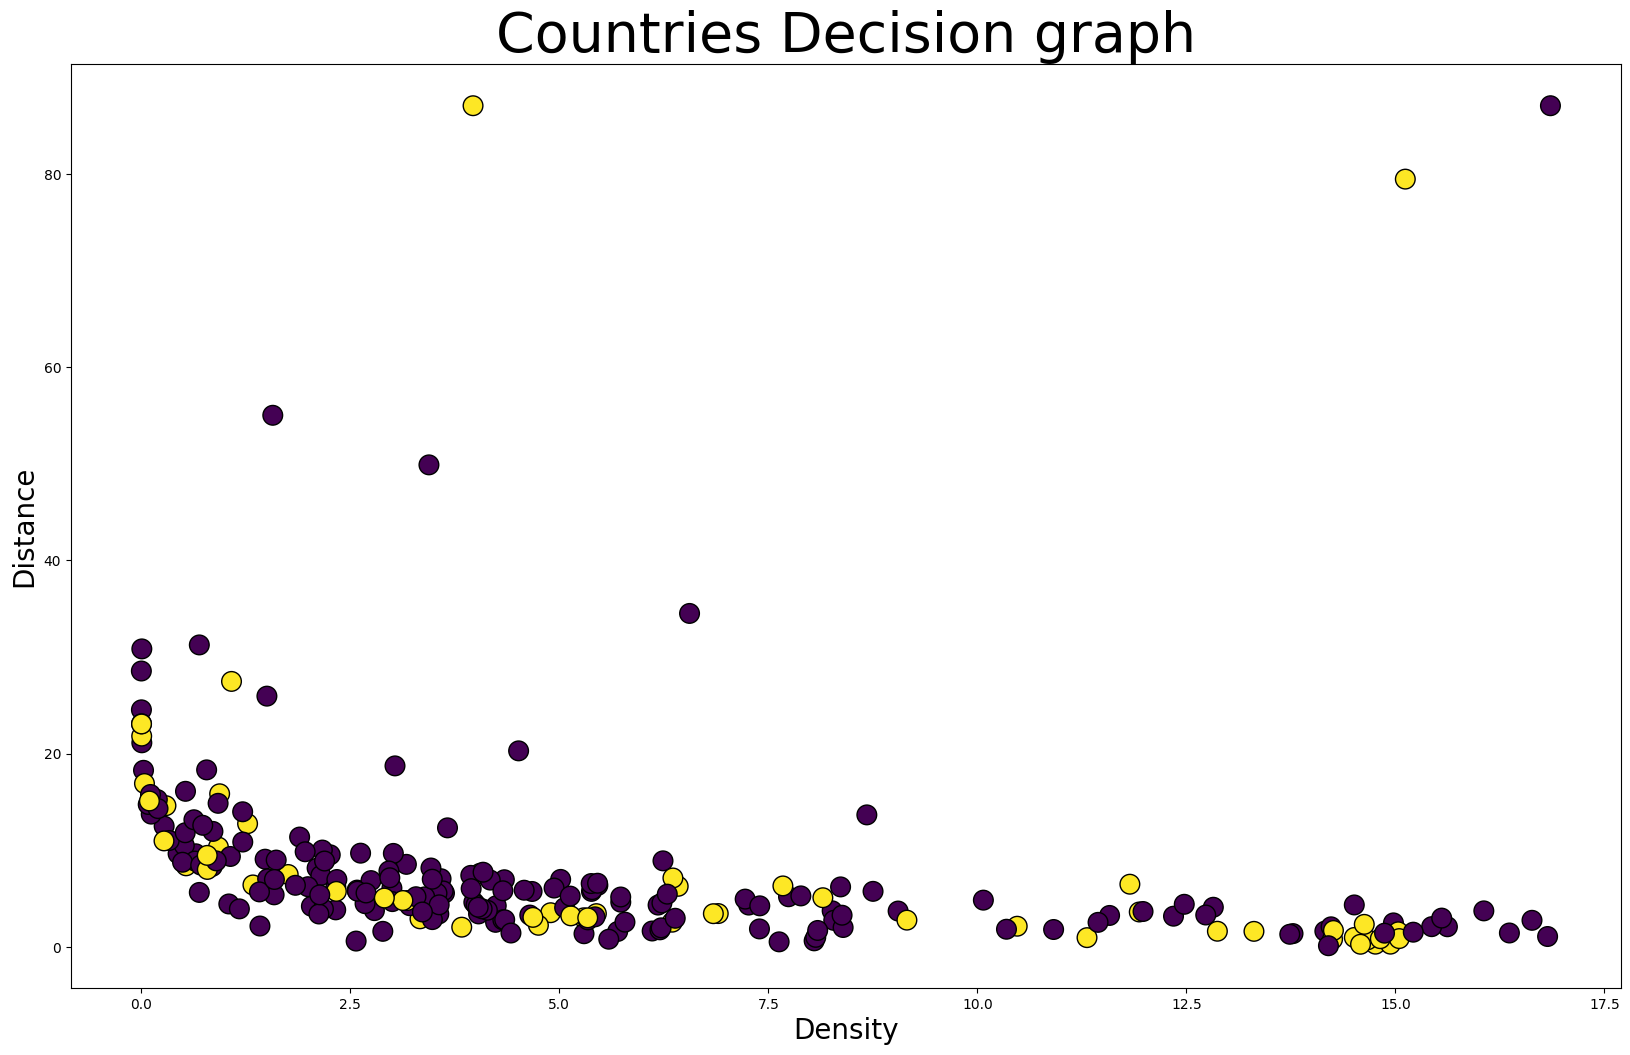

In [124]:
plt.figure(figsize=(20,12))
plt.scatter(
    rho,delta,
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("Density", fontsize=20)
plt.ylabel("Distance", fontsize=20)
plt.title( "Countries Decision graph", fontsize=40)
plt.show()

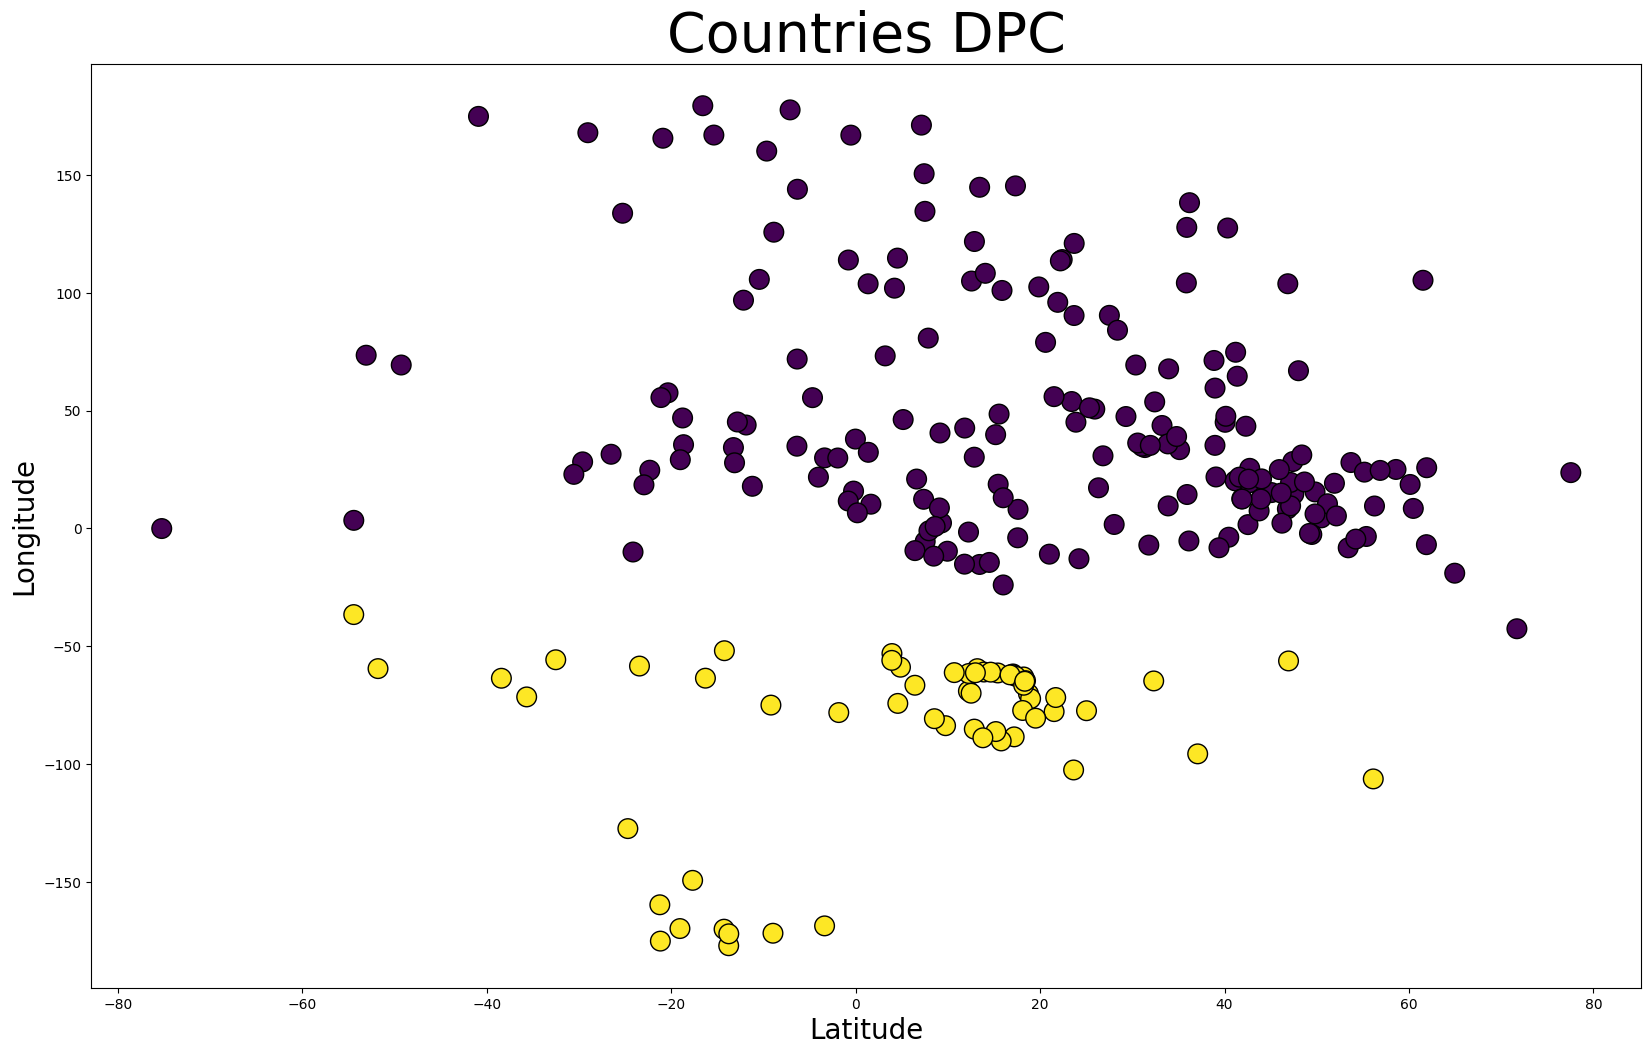

In [125]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:,0],data_arr[:,1],
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Longitude", fontsize=20)
plt.title("Countries DPC", fontsize=40)
plt.show()

In [126]:
from folium.plugins import MarkerCluster
from folium import CircleMarker
for i in range(len(labels)):
    if labels[i] == 95:
        labels[i] = 0
    else :
        labels[i] = 1

colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink',
           'gray', 'black', 'darkred', 'lightred', 'beige', 
           'darkblue', 'darkgreen', 'cadetblue', 'lightblue',
           'lightgreen', 'grayred', 'purple', 'orange', 
           'darkpurple', 'white', 'pink', 'lightgray', 'black']
myMap = folium.Map(location=[0, 0], zoom_start=2)
marker_cluster = MarkerCluster()
arr_data = np.array(data)
for i in range(len(arr_data)):
    folium.Marker(location=[arr_data[i][1], arr_data[i][2]], popup='Cluster ' + str(labels[i]+1), icon=folium.Icon(color=colors[labels[i]])).add_to(marker_cluster)
    CircleMarker(
        location=[arr_data[i][1], arr_data[i][2]],
        radius=7,
        color=colors[labels[i]],
        fill=True,
        fill_color=colors[labels[i]],
        fill_opacity=0.5
    ).add_to(myMap)
marker_cluster.add_to(myMap)
myMap

3. So sánh kết quả và nhận xét

So sánh:

     Dựa vào 3 bản đồ sau khi phân cụm ta có thể thấy được ở trong bài toán phân cụm này phương Pháp K-Means là hiểu quả nhất, sau đó đến DPC và cuối cùng là DBSCAN 

Nhận xét:

    - Về K-Means: Cách phân cụm của K-Means khá giống với cách phân chia lục địa của thế giới hiện tại. Chỉ có duy nhất ở chỗ giao giữa các châu Phi và châu Á và châu Âu do các nước có kích thước khá nhỏ và các tọa độ khá gần nhau nên trở thành 1 cụm.

    - Về DBCSAN: Cách phân cụm DBSCAN không phù hợp với bài toán này do các tọa độ ở chỗ tập trung nhiều, và có chỗ chỉ có 1, 2 nước nên khó có thể quét hết và phân cụm dễ dàng.

    - Về DPC: Phương pháp này dựa trên các điểm có mật độ cao nên chỉ phân thành 2 cụm, giống hệt với việc phân chia bán cầu Đông và bán cầu Tây của thế giới.
    
    